# Computer Vision Algorithm 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the image
image = cv2.imread('assets/hand_sign.jpg')  # Make sure the path to the image is correct

# Check if the image was loaded properly
if image is None:
    raise ValueError("Image not found or path is incorrect")

# Step 2: Resize the image to a standard size for consistency in processing
resized_image = cv2.resize(image, (600, 600))

# Step 3: Convert the resized image to grayscale
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Step 4: Apply Gaussian blur to the grayscale image for noise reduction
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 5: Apply Otsu's thresholding to the blurred image for binary segmentation
_, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 6: Use Canny edge detection on the thresholded image to find edges
edges = cv2.Canny(thresholded, 100, 200)

# Step 7: Apply morphological operations to close gaps in the edges (NEW STEP)
kernel = np.ones((5,5), np.uint8)
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Step 8: Find contours from the edge-detected image (UPDATED TO USE CLOSED EDGES)
contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 9: Filter contours based on area to eliminate small contours (NEW STEP)
area_threshold = 1000  # Set an area threshold to filter small contours, adjust as necessary
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > area_threshold]

# Proceed with the largest contour from filtered ones
if filtered_contours:
    largest_contour = max(filtered_contours, key=cv2.contourArea)
    # Step 10: Calculate the bounding box of the largest contour (NEW NUMBERING)
    x, y, w, h = cv2.boundingRect(largest_contour)
    # Step 11: Draw the bounding box on a copy of the resized image (NEW NUMBERING)
    image_with_bbox = cv2.rectangle(resized_image.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Step 12: Extract the Region of Interest (ROI) using the bounding box coordinates (NEW NUMBERING)
    roi = resized_image[y:y + h, x:x + w]
    # Step 13: Calculate the convex hull of the largest contour (NEW NUMBERING)
    hull = cv2.convexHull(largest_contour)
    # Step 14: Draw the convex hull on a copy of the image with the bounding box (NEW NUMBERING)
    image_with_hull = cv2.drawContours(image_with_bbox.copy(), [hull], -1, (255, 0, 0), 2)
else:
    raise ValueError("No suitable contour found")

# Use matplotlib to display the images
images = [image, resized_image, gray, blurred, thresholded, edges, closed_edges, image_with_bbox, roi, image_with_hull]
titles = ['Original Image', 'Resized Image', 'Grayscale Image', 'Blurred Image',
          'Thresholded Image', 'Edges', 'Closed Edges', 'Image with Bounding Box', 'ROI', 'Image with Convex Hull']


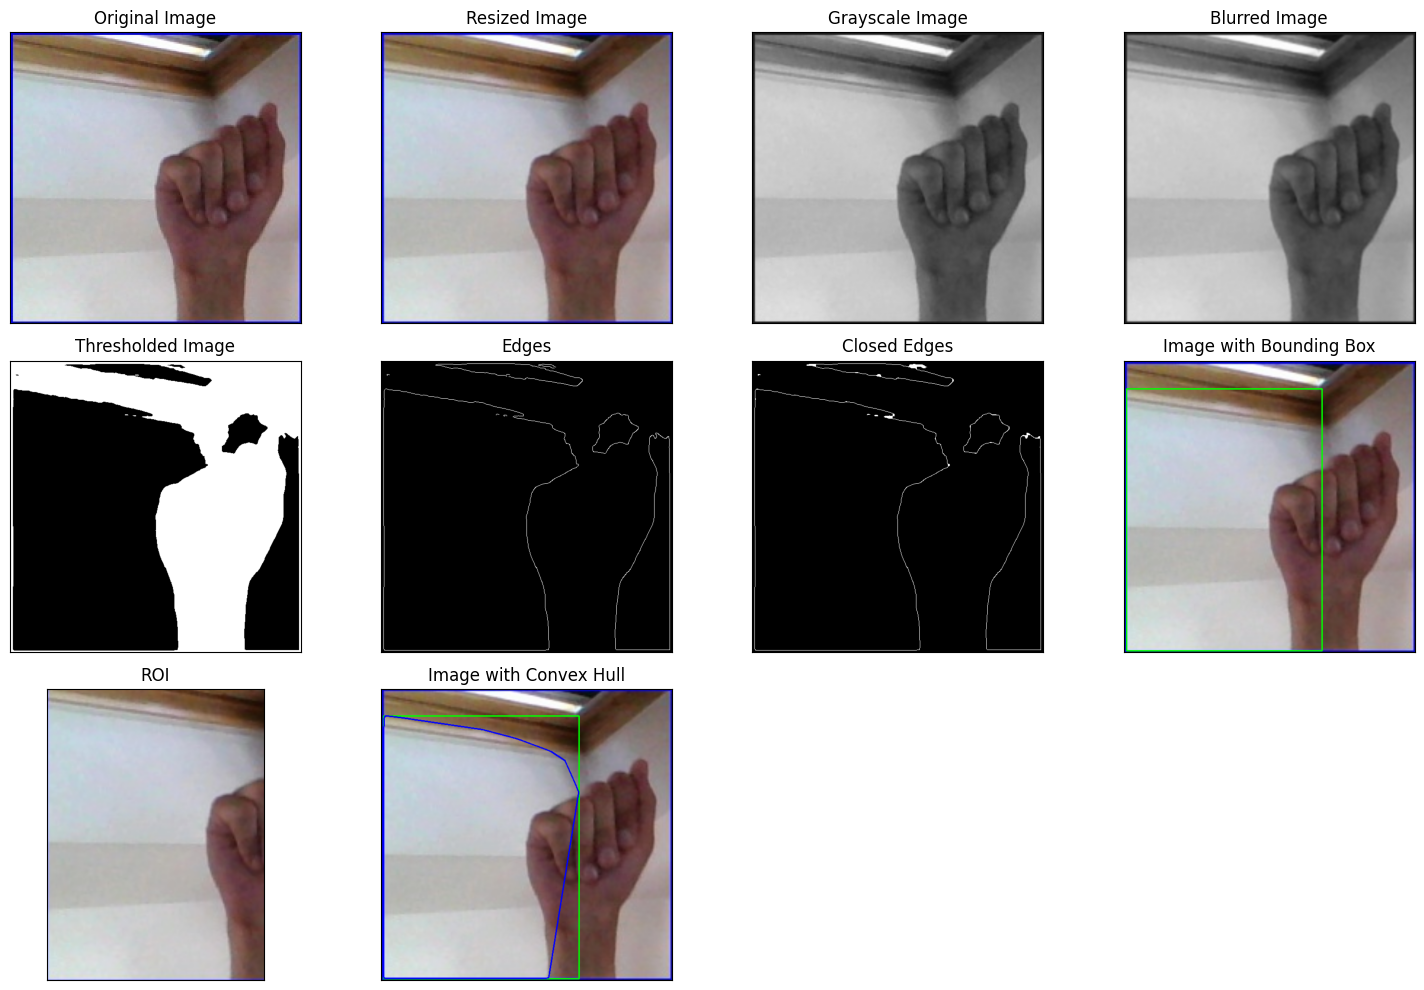

In [5]:
# Set up the figure size and display all images with their corresponding titles
plt.figure(figsize=(15, 10))
for i in range(len(images)):
    # Convert images to RGB for correct color representation before displaying
    plt.subplot(3, 4, i+1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Hide tick marks
plt.tight_layout()
plt.show()